<a href="https://colab.research.google.com/github/vaishnavipatil29/OneHotML_projects/blob/main/SPAM_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as plt

Import Dataset

In [28]:
messages = pd.read_csv('https://raw.githubusercontent.com/vaishnavipatil29/OneHotML_projects/main/spam.csv',encoding="ISO-8859-1")
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [29]:
messages = messages.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
messages = messages.rename(columns={'v1':'label', 'v2':'message'})
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


EDA

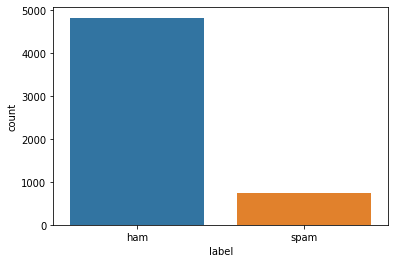

In [30]:
sns.countplot(data=messages, x = 'label')

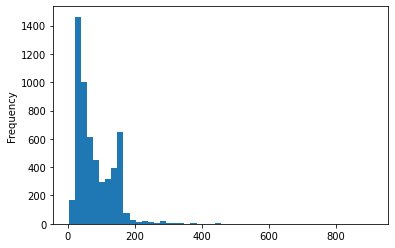

In [31]:
messages['message'].apply(len).plot(kind= 'hist', bins=50)


Data Preprocessing : NLP

In [32]:
import string
from nltk.corpus import stopwords
"""
Takes in a string of text, then performs the following:
1. Removes all punctuation
2. Removes all stopwords
3. Returns a list of the cleaned text
"""
def text_perprocessing(message):
    
    #check char to see if there are any punctuation
    nopunc = [char for char in message if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
messages['message'].head(5).apply(text_perprocessing)


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [51]:

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(messages['message'], messages['label'], test_size = 0.3, random_state = 0)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

cv = CountVectorizer(analyzer=text_perprocessing)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)


Algorithms

In [37]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)
nb_score

0.9832535885167464

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_score = accuracy_score(y_test, lr_pred)
lr_score

0.9748803827751196

In [39]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
svm_score = accuracy_score(y_test, svm_pred)
svm_score

0.9647129186602871

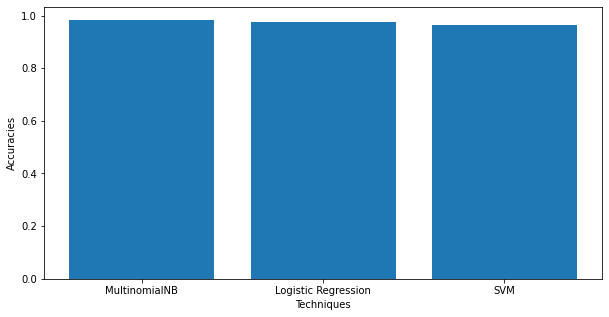

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 5)) 
#ax = fig.add_axes([0,0,1,1])
Name = ['MultinomialNB', 'Logistic Regression','SVM']
accuracies = [nb_score,lr_score,svm_score]
plt.bar(Name,accuracies)
plt.ylabel('Accuracies')
plt.xlabel('Techniques')
plt.show()

Testing

In [60]:
message = 'Free entry to stadium'
m = text_perprocessing(message)
m

['Free', 'entry', 'stadium']

In [62]:
# use vector.vocabulary for predict
vector = CountVectorizer(vocabulary=cv.vocabulary_) #vocabulary is a parameter, it should be vocabulary_ as it is an attribute.
text_vector = cv.transform(m)
outcome = nb.predict(text_vector)
print(outcome)

['spam' 'spam' 'ham']
